In [2]:
import matplotlib.pyplot as plt
import numpy as np

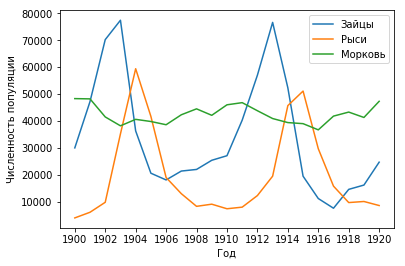

In [4]:
#1
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
time = data[:,0]
plt.plot(time,data[:,1], label = "Зайцы")
plt.plot(time,data[:,2], label = "Рыси")
plt.plot(time,data[:,3], label = "Морковь")
plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("Год")
plt.ylabel("Численность популяции")
plt.legend()
plt.show()

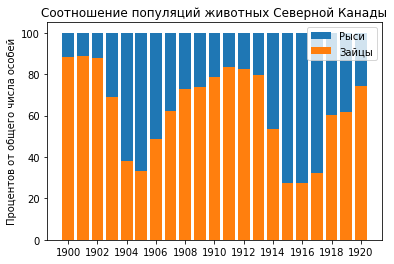

In [15]:
#2
plt.bar(time, 100, label = "Рыси")
plt.bar(time, 100*data[:,1]/(data[:,1]+data[:,2]), label = "Зайцы")
plt.title("Соотношение популяций животных Северной Канады")
plt.xticks(np.arange(1900,1921, step = 2))
plt.ylabel("Процентов от общего числа особей")
plt.legend()
plt.show()

Среднее: [34080.95238095 20166.66666667 42400.        ]
Среднеквадратичное отклонение: [20897.90645809 16254.59153691  3322.50622558]


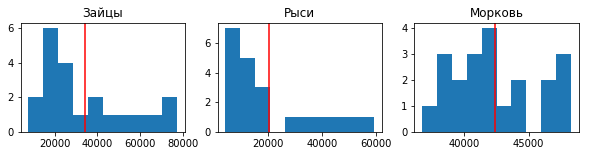

In [79]:
#3
m = data.mean(axis = 0)
mask = [False, True, True, True]
std = pow(pow((data - m), 2).mean(axis=0), 1/2) #если std - среднеквадратичное отклонение
print("Среднее:",m[mask])
print("Среднеквадратичное отклонение:",std[mask])
figure,plots = plt.subplots(1, 3, figsize = (10,2))
plots[0].hist(data[:, 1])
plots[0].set_title('Зайцы')
plots[0].axvline(x=m[1], color='red')
plots[1].hist(data[:, 2])
plots[1].set_title('Рыси')
plots[1].axvline(x=m[2], color='red')
plots[2].hist(data[:, 3])
plots[2].set_title('Морковь')
plots[2].axvline(x=m[3], color='red')

plt.show()

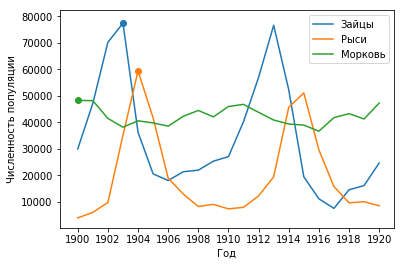

In [100]:
#4
k=data[data.argmax(axis = 0)[mask], 0]

plt.plot(time,data[:,1], label = "Зайцы")
plt.plot(time,data[:,2], label = "Рыси")
plt.plot(time,data[:,3], label = "Морковь")
plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("Год")
plt.ylabel("Численность популяции")
plt.legend()
plt.scatter(time[data[:,1].argmax()], data[:,1].max())
plt.scatter(time[data[:,2].argmax()], data[:,2].max())
plt.scatter(time[data[:,3].argmax()], data[:,3].max())
plt.show()

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


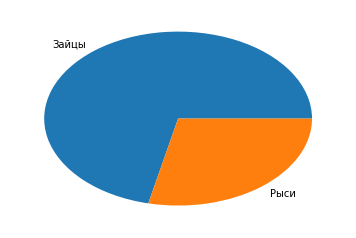

In [101]:
#5
distr = np.where(data[:,1] >= data[:,2], 'H', 'L').tolist()
print(distr)
plt.pie([distr.count('H'),distr.count('L')], labels = ['Зайцы','Рыси'])
plt.show()

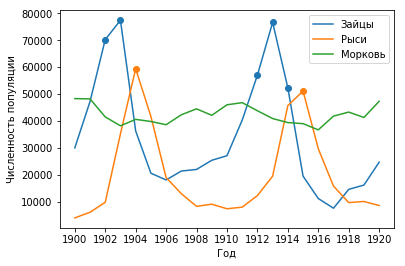

In [102]:
#6
plt.scatter(time[data[:,1]>50000],data[:,1][data[:,1]>50000])
plt.scatter(time[data[:,2]>50000],data[:,2][data[:,2]>50000])
plt.scatter(time[data[:,3]>50000],data[:,3][data[:,3]>50000])
plt.plot(time,data[:,1], label = "Зайцы")
plt.plot(time,data[:,2], label = "Рыси")
plt.plot(time,data[:,3], label = "Морковь")
plt.xticks(np.arange(1900,1921, step = 2))
plt.xlabel("Год")
plt.ylabel("Численность популяции")
plt.legend()
plt.show()

In [109]:
#7
print(np.transpose(time[np.argsort(data, axis=0)[0:2]])[mask])

[[1917. 1916.]
 [1900. 1901.]
 [1916. 1903.]]


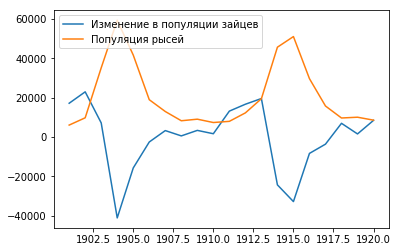

-0.8494801603656876


In [122]:
#8
ch_hares = data[1:,1] - data[:20,1]
plt.plot(time[1:], ch_hares, label = "Изменение в популяции зайцев")
plt.plot(time[1:], data[1:,2], label = "Популяция рысей")
plt.legend()
plt.show()
print(np.corrcoef(ch_hares,data[1:,2])[1,0])

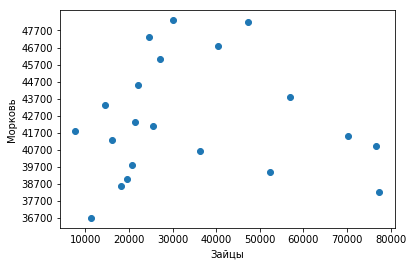

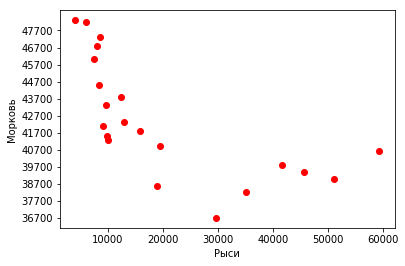

In [127]:
#9
plt.scatter(data[:,1],data[:,3])
plt.yticks(np.arange(data[:,3].min(),data[:,3].max(),1000))
plt.xlabel("Зайцы")
plt.ylabel("Морковь")
plt.show()
plt.scatter(data[:,2],data[:,3], color = 'red')
plt.yticks(np.arange(data[:,3].min(),data[:,3].max(),1000))
plt.xlabel("Рыси")
plt.ylabel("Морковь")
plt.show()

In [162]:
import sklearn.linear_model as lm
reg = lm.LinearRegression()
ch_hares = data[1:20,1] - data[:19,1]
lynxes = data[:19,2].reshape(-1,1)
reg.fit(lynxes,ch_hares)
prediction = reg.predict(data[20,2])[0] + data[19,1]
print(prediction)
print(np.abs(prediction / data[20, 1] - 1))

24364.929407444484
0.013565611034636271
